In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('trainingset.csv')

In [3]:
df.head(10)

,index,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Rawah,Neota,forest_cover_type
0,1,3198,1,6,504,85,3508,16,7,1,0,1
1,2,3437,5,10,865,169,3509,7,49,0,0,1
2,3,987,319,4,376,154,758,150,11,0,0,0
3,4,3009,133,7,339,81,3561,51,15,0,0,1
4,5,790,30,9,0,0,1503,18,0,0,0,1
5,6,3160,14,10,450,101,1168,11,0,0,0,0
6,7,934,4,10,67,7,3558,4,16,1,0,0
7,8,941,100,4,60,1,1031,6,36,0,0,0
8,9,780,71,11,97,5,1905,30,19,1,0,0
9,10,3087,83,13,190,31,5003,38,17,1,0,1


In [4]:
df.shape

(999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
index                               999 non-null int64
Elevation                           999 non-null int64
Aspect                              999 non-null int64
Slope                               999 non-null int64
Horizontal_Distance_To_Hydrology    999 non-null int64
Vertical_Distance_To_Hydrology      999 non-null int64
Horizontal_Distance_To_Roadways     999 non-null int64
Hillshade_9am                       999 non-null int64
Hillshade_Noon                      999 non-null int64
Rawah                               999 non-null int64
Neota                               999 non-null int64
forest_cover_type                   999 non-null int64
dtypes: int64(12)
memory usage: 93.7 KB


///def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='80')
    fig=sns.barplot(ms.index, ms["Percent"],color="red",alpha=0.8)
    plt.xlabel('Independent variables', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('NaN exploration', fontsize=15)
    return ms

missingdata(df)///

In [6]:
print(df.isnull().sum())


index                               0
Elevation                           0
Aspect                              0
Slope                               0
Horizontal_Distance_To_Hydrology    0
Vertical_Distance_To_Hydrology      0
Horizontal_Distance_To_Roadways     0
Hillshade_9am                       0
Hillshade_Noon                      0
Rawah                               0
Neota                               0
forest_cover_type                   0
dtype: int64


In [7]:
df.describe()

,index,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Rawah,Neota,forest_cover_type
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,500.000000,1965.379379,113.792793,10.274274,242.106106,37.825826,2042.316316,60.616617,40.655656,0.489489,0.042042,0.400400
std,288.530761,1146.887432,106.061993,6.257729,233.286223,50.020794,1698.368943,72.281307,51.950469,0.500140,0.200786,0.490225
min,1.000000,403.000000,0.000000,0.000000,0.000000,-91.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,250.500000,874.500000,37.000000,6.000000,60.000000,3.000000,706.000000,8.000000,8.000000,0.000000,0.000000,0.000000
50%,500.000000,998.000000,80.000000,10.000000,150.000000,19.000000,1384.000000,30.000000,30.000000,0.000000,0.000000,0.000000
75%,749.500000,3088.500000,158.000000,14.000000,390.000000,60.000000,3503.500000,141.000000,45.000000,1.000000,0.000000,1.000000
max,999.000000,3571.000000,359.000000,41.000000,1146.000000,360.000000,6591.000000,199.000000,199.000000,1.000000,1.000000,1.000000


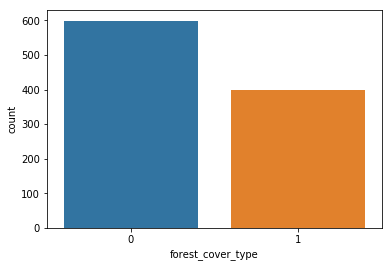

In [8]:
sns.countplot(x='forest_cover_type',data=df);

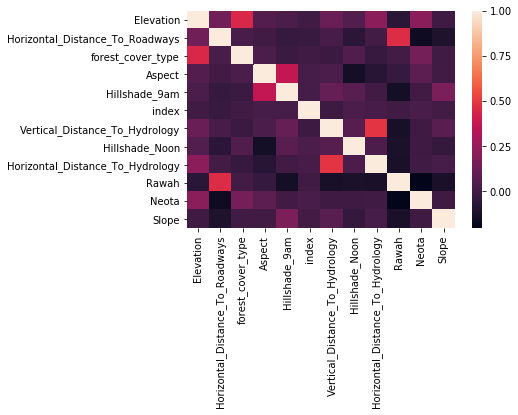

In [9]:
numerical = list(set(df.columns))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

In [10]:
#sns.countplot(x='Elevation', hue='forest_cover_type', data=df);

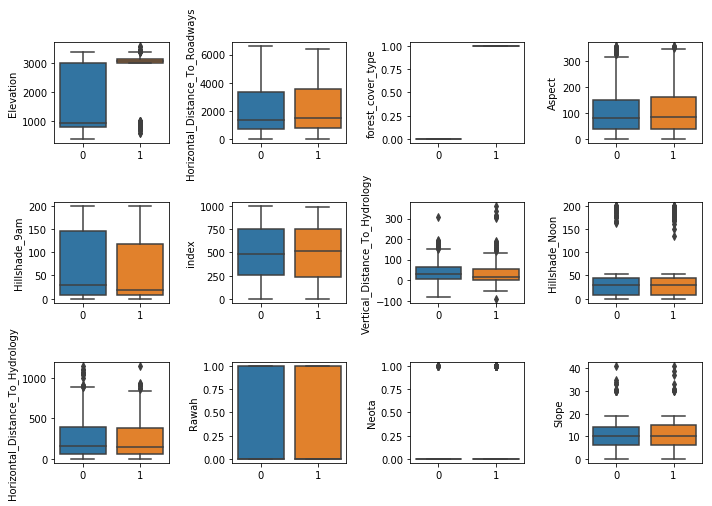

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='forest_cover_type', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

Relation b/w Elevation and forest_cover_type

In [12]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [13]:
X = df.drop(['forest_cover_type'], axis=1)

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

Wall time: 22.2 s


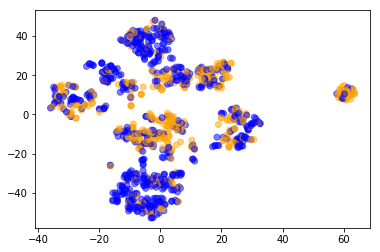

In [16]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['forest_cover_type'].map({False: 'blue', True: 'orange'}), alpha=.5);

SVC will work efficiently inference drawn

In [20]:
drop_column = ['index']
df.drop(drop_column, axis=1, inplace = True)

In [21]:
X,y = df.drop('forest_cover_type',axis=1),df['forest_cover_type']

In [22]:
X.shape,y.shape

((999, 10), (999,))

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 10 columns):
Elevation                           999 non-null int64
Aspect                              999 non-null int64
Slope                               999 non-null int64
Horizontal_Distance_To_Hydrology    999 non-null int64
Vertical_Distance_To_Hydrology      999 non-null int64
Horizontal_Distance_To_Roadways     999 non-null int64
Hillshade_9am                       999 non-null int64
Hillshade_Noon                      999 non-null int64
Rawah                               999 non-null int64
Neota                               999 non-null int64
dtypes: int64(10)
memory usage: 78.1 KB


In [24]:
from sklearn.model_selection import train_test_split

X_train,X_holdout,y_train,y_holdout = train_test_split(X,y,test_size=.3,random_state=17)

In [25]:
X_train.shape,X_holdout.shape

((699, 10), (300, 10))

Descision trees

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
tree = DecisionTreeClassifier(random_state=17)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [29]:
params={'max_depth' : np.arange(2,11),'min_samples_leaf' :  np.arange(1,11)}

In [30]:
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=17)

In [31]:
best_tree=GridSearchCV(estimator=tree,param_grid=params,cv=skf,n_jobs=-1,verbose=1)

In [32]:
best_tree.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    4.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [33]:
best_tree.best_params_

{'max_depth': 3, 'min_samples_leaf': 1}

In [34]:
best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [35]:
best_tree.best_score_

0.7124463519313304

In [36]:
pred_holdout_better=best_tree.predict(X_holdout)

In [37]:
accuracy_score(pred_holdout_better,y_holdout)

0.7566666666666667

Gradient boosting 

In [39]:
test_df=pd.read_csv("testset.csv")

In [40]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=22)

In [ ]:
#y_train,y_holdout = train_test_split(X,y,test_size=.3,random_state=17)

In [44]:
#X = traindf.drop("Survived", axis=1)
#train_Y=traindf["Survived"]
#test_X  = testdf.drop("PassengerId", axis=1).copy()
#train_X.shape, train_Y.shape, test_X.shape


import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

modelf = GridSearchCV(model,param_grid = param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

modelf.fit(X_train,y_train)


# Best Estimator
modelf.best_estimator_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   48.0s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1913 out of 1920 | elapsed:  1.7min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.8min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=0.2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [45]:
modelf.best_score_

0.7153075822603719

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

Accuracy 66.67
The cross validated score 64.66


Text(0.5,1.05,'Confusion matrix')

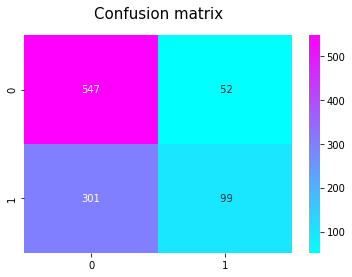

In [47]:
all_features = df.drop("forest_cover_type",axis=1)
Targeted_feature = df["forest_cover_type"]

from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train)
prediction_gnb=model.predict(X_holdout)


print('Accuracy',round(accuracy_score(prediction_gnb,y_holdout)*100,2))
result_gnb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 72.0
The cross validated score 71.08


Text(0.5,1.05,'Confusion matrix')

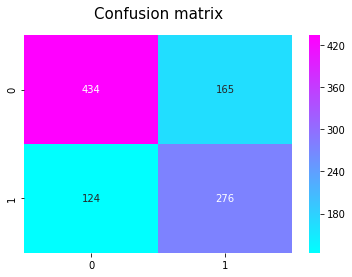

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_holdout)


print('Accuracy',round(accuracy_score(prediction_lda,y_holdout)*100,2))
result_lda=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_lda.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 73.0
The cross validated score 72.07


Text(0.5,1.05,'Confusion matrix')

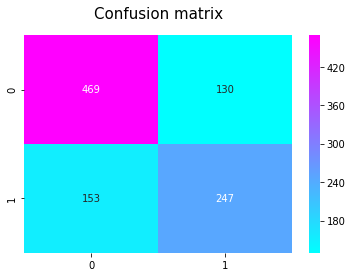

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_holdout)


print('Accuracy',round(accuracy_score(prediction_gbc,y_holdout)*100,2))
result_gbc=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)

Accuracy 73.67
The cross validated score 71.47


Text(0.5,1.05,'Confusion matrix')

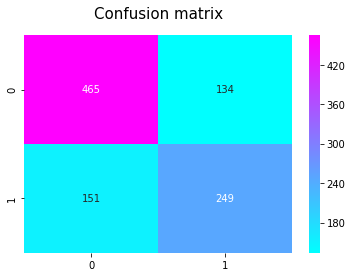

In [50]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_holdout)


print('Accuracy',round(accuracy_score(prediction_adb,y_holdout)*100,2))
result_adb=cross_val_score(model,all_features,Targeted_feature,cv=10,scoring='accuracy')
print('The cross validated score',round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="cool")
plt.title('Confusion matrix', y=1.05, size=15)